### Import required libraries

In [63]:
import pandas as pd
import numpy as np

### Load the csv file in to dataframe

In [64]:
dat3=pd.read_csv('weatherHistory.csv')

In [65]:
dat3.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [66]:
dat3.dtypes #the datatypes of the attributes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [67]:
['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Cloud Cover', 'Pressure (millibars)']

['Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Cloud Cover',
 'Pressure (millibars)']

In [68]:
dat3=dat3.drop(['Summary', 'Precip Type','Daily Summary','Formatted Date'],axis=1) 

In [69]:
dat3=dat3.rename(columns={'Loud Cover':'Cloud Cover'}) # rename loud cover to cloud cover

Final attributes (Independent variables):
-temperature
-humidity
-windSpeed
-windBearing
-visibility
-cloud Cover
-pressure

Dependent variable:
-Apparent Temperature



In [70]:
print(f'Shape of final data set: {dat3.shape}')

Shape of final data set: (96453, 8)


### Create a scatterplot of each independent variable vs. the dependent variable

In [71]:
sample_df = dat3.sample(frac=0.05, random_state=17) # taking 5% data as sample

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

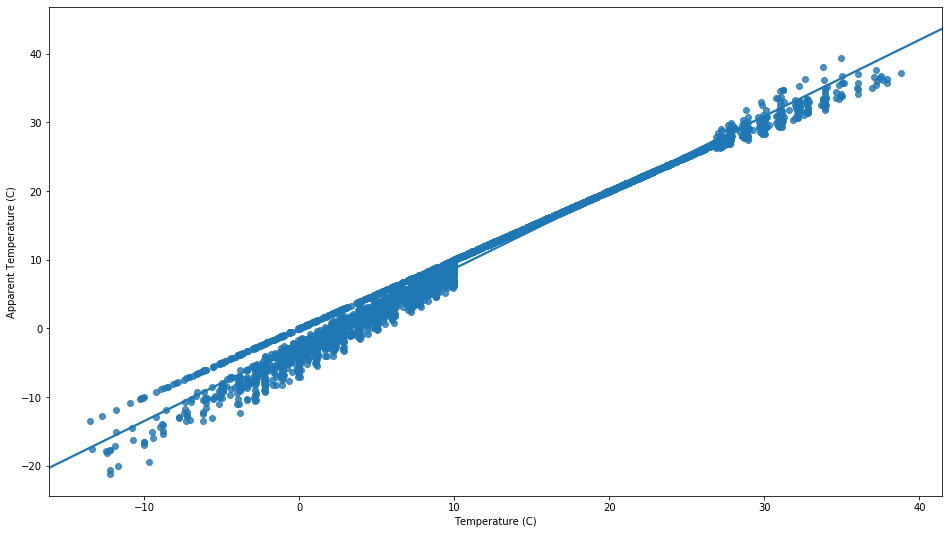

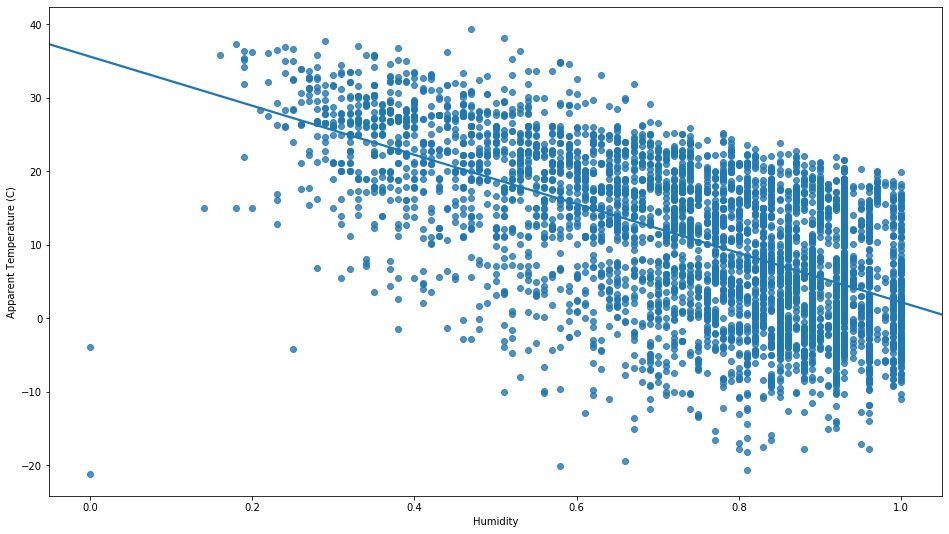

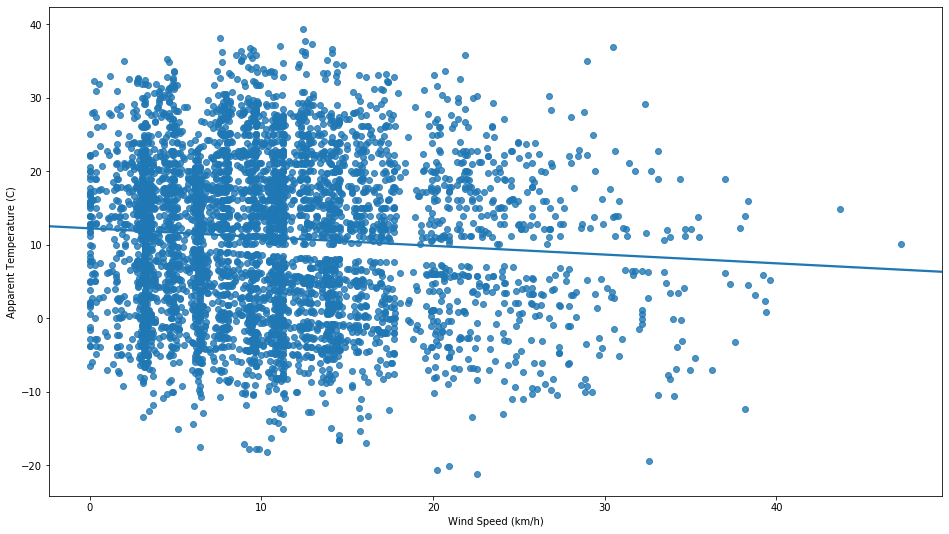

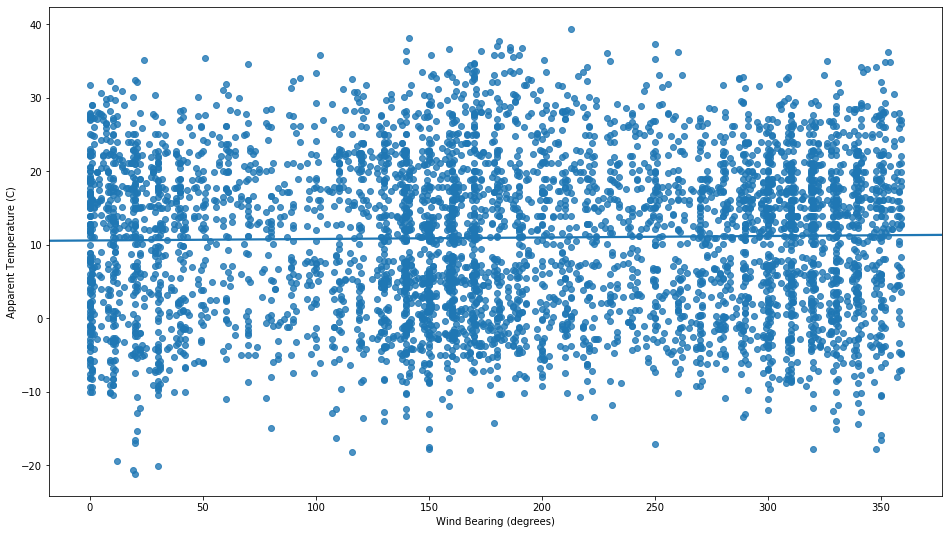

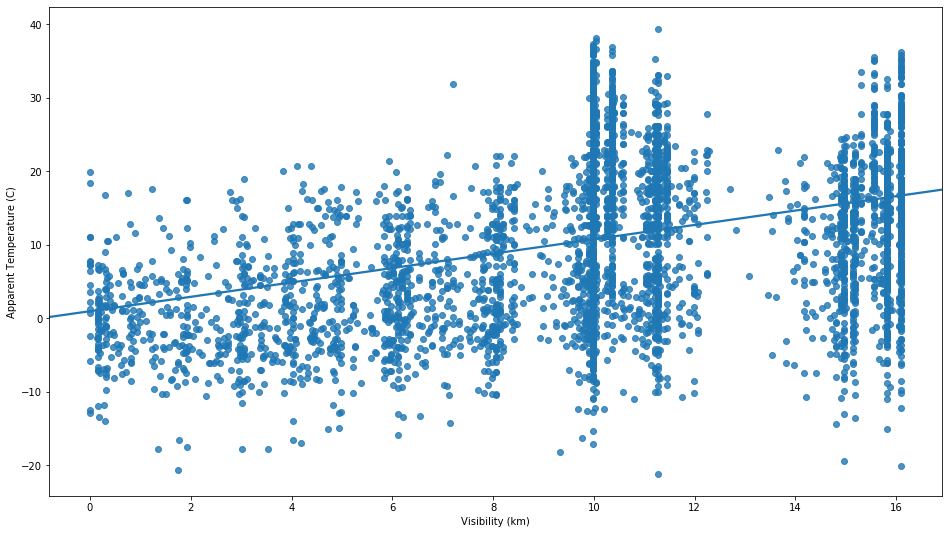

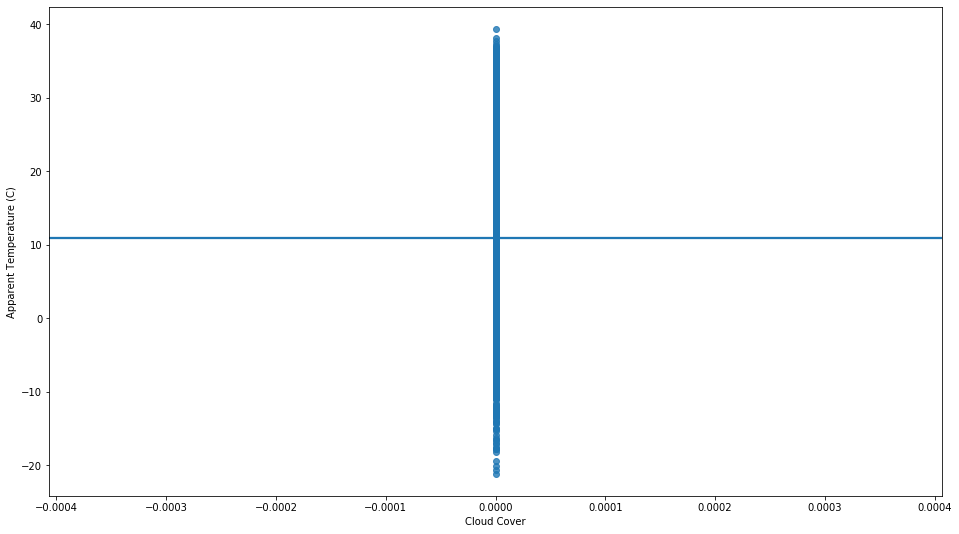

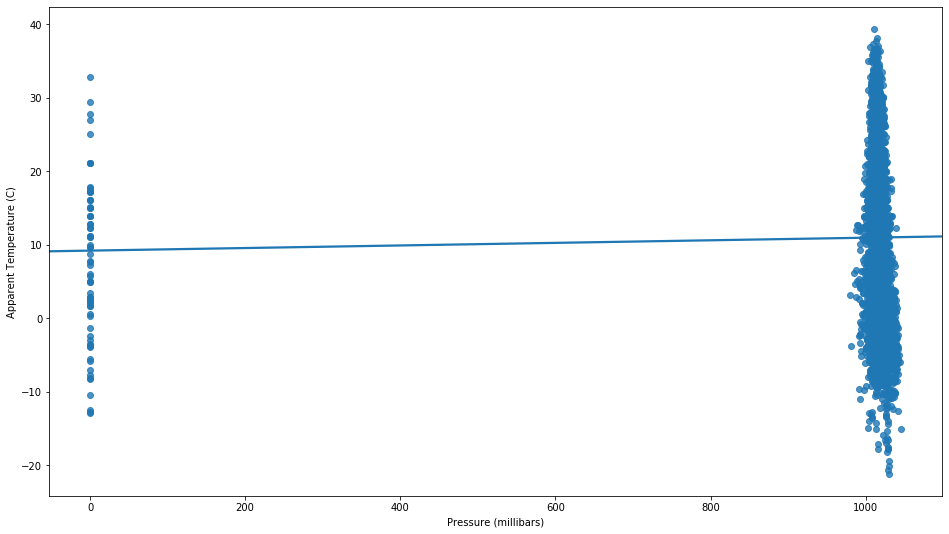

In [73]:
for col in dat3.columns:
    if col!='Apparent Temperature (C)':
         plt.figure(figsize=(16, 9))
         sns.regplot(data=sample_df, x=col, y='Apparent Temperature (C)',ci=None)

### Split dataset for training and for testing

In [74]:
from sklearn.model_selection import train_test_split


In [75]:
X_train, X_test, y_train, y_test = train_test_split(dat3[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Cloud Cover', 'Pressure (millibars)']].values,dat3['Apparent Temperature (C)'].values,test_size=0.2)

In [76]:
print(f'Shape of training data: {X_train.shape, y_train.shape}')
print(f'Shape of testing data: {X_test.shape, y_test.shape}')

Shape of training data: ((77162, 7), (77162,))
Shape of testing data: ((19291, 7), (19291,))


### Training the machine learning model on the training data

In [77]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
model=linear_regression.fit(X=X_train, y=y_train)

In [95]:
feature_names=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Cloud Cover', 'Pressure (millibars)']
#print the linear regression coefficients and the y intercept
for i, name in enumerate(feature_names):
    print(f'{name}: {linear_regression.coef_[i]:24.20f}')

print()
    
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

Temperature (C):   0.87235405918571362616
Humidity:  -1.42158926103364136040
Wind Speed (km/h):   0.07963480911330350631
Wind Bearing (degrees):  -0.00043255703547692378
Visibility (km):   0.00834637021319985239
Cloud Cover:   0.00000000000000000000
Pressure (millibars):  -0.00022214535432449719

y-intercept:  2.86761111034309479351


### Test the model on testing data.

In [79]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.5f}')
print(f'     correlation coefficient = {r:.5f}')

coefficient of determination = 0.98978
     correlation coefficient = 0.99488


The correlation cofficient 0.99 which is very close to 1. Hence, the correlation between the predicted values and the expected
values of the dependent variable is really strong and the model's predictions are accurate to a large extent.

### Scatterplot of predicted vs. expected values

In [80]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)


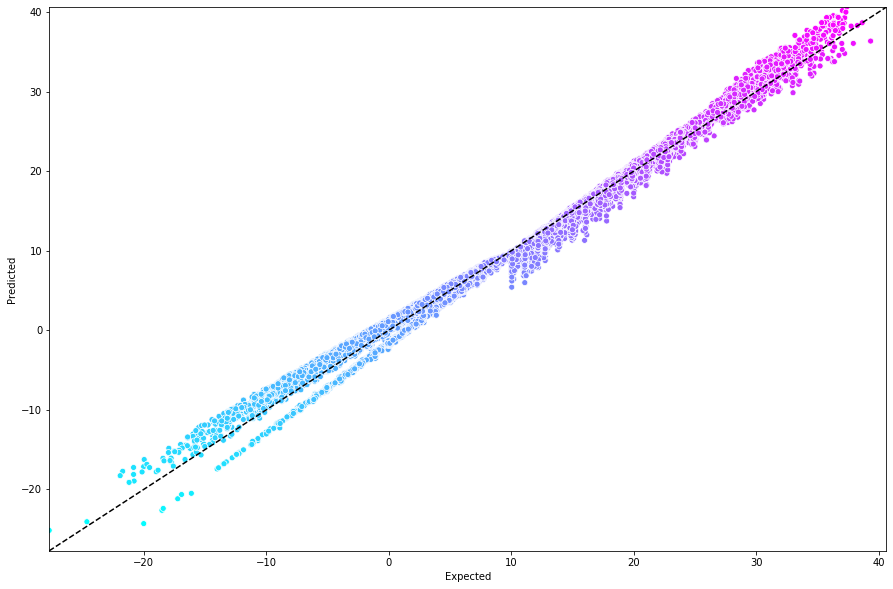

In [81]:
figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')



### Comparison of Expected and Predicted values

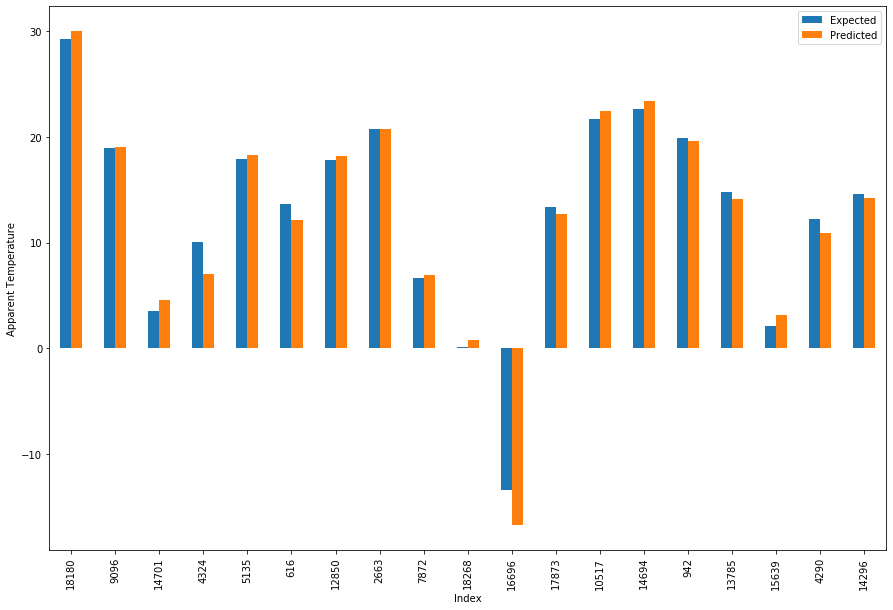

In [82]:
df1=df.sample(frac=0.001, random_state=17)

ax=df1.plot(kind='bar',figsize=(15,10))
ax.set_ylabel("Apparent Temperature")
ax.set_xlabel("Index")
plt.show()

### Additional analysis

We can calculate the accuracy score of the model using following function:

In [83]:
print(f'Score: {model.score(X_test, y_test):.3f}')

Score: 0.990


In [84]:
X_train, X_test, y_train, y_test = train_test_split(dat3[['Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Cloud Cover', 'Pressure (millibars)']].values,dat3['Temperature (C)'].values,test_size=0.2)

In [85]:
print(f'Shape of training data: {X_train.shape, y_train.shape}')
print(f'Shape of testing data: {X_test.shape, y_test.shape}')

Shape of training data: ((77162, 7), (77162,))
Shape of testing data: ((19291, 7), (19291,))


In [86]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
model=linear_regression.fit(X=X_train, y=y_train)

In [87]:
feature_names=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Cloud Cover', 'Pressure (millibars)']
#print the linear regression coefficients and the y intercept
for i, name in enumerate(feature_names):
    print(f'{name}: {linear_regression.coef_[i]:24.20f}')

print()
    
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

Temperature (C):   0.87235405918571362616
Humidity:  -1.42158926103364136040
Wind Speed (km/h):   0.07963480911330350631
Wind Bearing (degrees):  -0.00043255703547692378
Visibility (km):   0.00834637021319985239
Cloud Cover:   0.00000000000000000000
Pressure (millibars):  -0.00022214535432449719

y-intercept:  2.86761111034309479351


In [88]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.5f}')
print(f'     correlation coefficient = {r:.5f}')

coefficient of determination = 0.98999
     correlation coefficient = 0.99498


In [89]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)


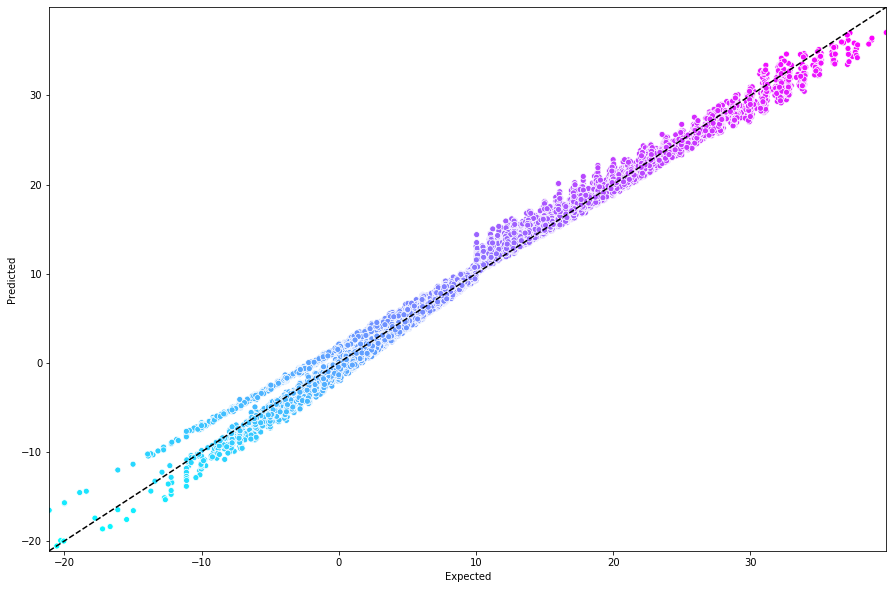

In [90]:
figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')


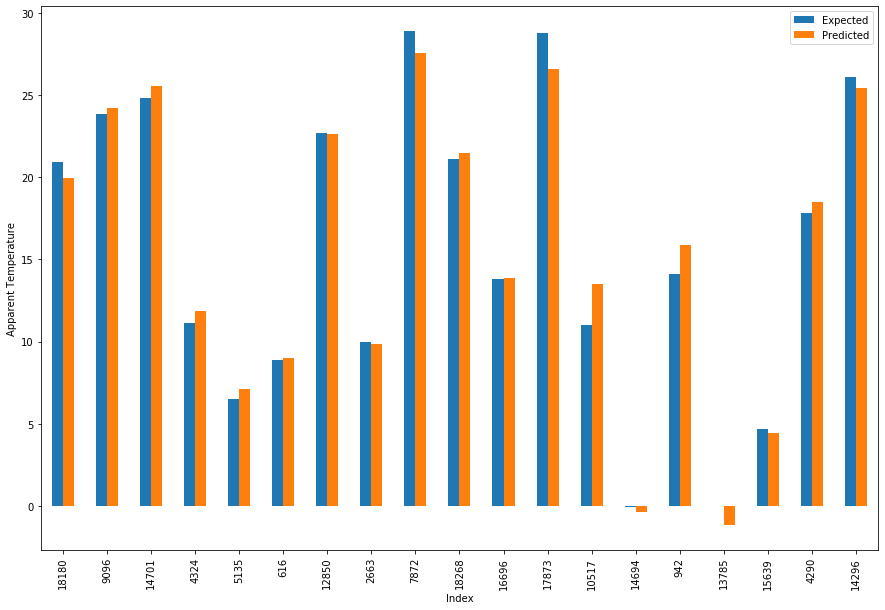

In [91]:
df1=df.sample(frac=0.001, random_state=17)

ax=df1.plot(kind='bar',figsize=(15,10))
ax.set_ylabel("Apparent Temperature")
ax.set_xlabel("Index")
plt.show()

In [92]:
print(f'Score: {model.score(X_test, y_test):.3f}')

Score: 0.990
